In [4]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
#Cell_2.
csv_in = 'grades-mid.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [6]:
#Cell_3.
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0,encoding='shift-jis')
print(df.shape)
print(df.info())
display(df.head())

(30, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student ID  30 non-null     int64
 1   Math        30 non-null     int64
 2   Physics     30 non-null     int64
 3   English     30 non-null     int64
 4   French      30 non-null     int64
dtypes: int64(5)
memory usage: 1.3 KB
None


,Student ID,Math,Physics,English,French
0,1,78,75,92,87
1,2,88,79,85,77
2,3,87,90,78,51
3,4,91,72,83,66
4,5,76,88,65,73


In [7]:
#Cell_4.
dfX =df.drop(columns='Student ID')
n=dfX.shape[0] #sample size.
p=dfX.shape[1] #number of features.

print(n)
print(dfX.shape)
display(dfX.head())

30
(30, 4)


,Math,Physics,English,French
0,78,75,92,87
1,88,79,85,77
2,87,90,78,51
3,91,72,83,66
4,76,88,65,73


In [9]:
#Cell_5.
sc = StandardScaler()
X_std = sc.fit_transform(dfX)*(np.sqrt(n-1))/(np.sqrt(n))
print(X_std)

[[-0.19536054 -0.33887867  0.98072878  1.07414437]
 [ 1.02564284 -0.01355515  0.34507124  0.10934404]
 [ 0.90354251  0.88108453 -0.2905863  -2.39913683]
 [ 1.39194386 -0.58287131  0.1634548  -0.95193633]
 [-0.43956122  0.71842277 -1.47109317 -0.2765761 ]
 [ 0.65934183 -0.25754779  0.88992056  0.39878414]
 [-0.6837619   0.14910661 -0.19977808 -0.37305613]
 [-2.14896596 -0.01355515  0.52668768  2.13542474]
 [ 1.26984352  1.12507717 -1.19866851 -0.08361603]
 [-1.29426359 -0.17621691 -0.83543563  1.26710444]
 [-0.31746088  0.39309925  1.16234522 -0.75897626]
 [-1.29426359 -3.10412858  1.34396166  0.68822424]
 [-0.92796257  0.55576101 -0.10896986 -1.04841636]
 [ 0.17094047 -0.50154043  0.25426302 -0.18009606]
 [ 1.02564284 -0.90819483 -0.38139452  0.5917442 ]
 [-1.29426359 -1.64017275  0.88992056  1.1706244 ]
 [ 0.53724149  1.20640805  0.6174959   0.3023041 ]
 [ 0.90354251  1.04374629 -1.10786029 -1.43433649]
 [-0.56166156 -0.90819483  1.25315344  0.97766434]
 [ 0.04884014  0.23043749 -0.83

In [10]:
#Cell_6.
n_pca = 2
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [11]:
#Cell_7.
print(X_pca.shape)
print(X_pca)

(30, 2)
[[ 1.31368069 -0.34643327]
 [-0.21667507 -1.01078421]
 [-2.23576405 -0.51390197]
 [-0.70727823 -1.44773397]
 [-1.08016278  1.26673144]
 [ 0.50161096 -1.02639273]
 [-0.06681788  0.67789472]
 [ 2.31450563  1.64320406]
 [-1.8193247  -0.15004075]
 [ 0.88400813  1.51096594]
 [ 0.14179025 -0.2535915 ]
 [ 3.26491625 -0.40558914]
 [-0.47073036  0.90182996]
 [ 0.22990336 -0.41546329]
 [ 0.13255623 -0.86665696]
 [ 2.49755223  0.25159909]
 [-0.41201054 -0.39590775]
 [-2.25147809 -0.00342495]
 [ 1.87016344 -0.34198648]
 [-0.85886098  0.39851558]
 [-0.93095534 -0.5399165 ]
 [-1.2053109  -0.99192979]
 [ 1.68225924 -0.68237093]
 [-1.88938119  0.16930625]
 [ 0.49709839  0.09532503]
 [-1.22292645  0.04348688]
 [-0.08545013  1.45266629]
 [ 0.31163764 -0.62474823]
 [ 2.32817941  0.18408411]
 [-2.51673517  1.42126306]]


In [12]:
#Cell_8.
print('eigenvalues:',pca.explained_variance_)
print('eigenvectors:',pca.components_)

eigenvalues: [2.31541556 0.7041994 ]
eigenvectors: [[-0.4445017  -0.53251862  0.51170374  0.5069531 ]
 [-0.82281352  0.27451328 -0.49336511  0.06489398]]


In [9]:
#Cell_9.
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) 
print(loadings)

[[-0.67637554 -0.69047705]
 [-0.8103064   0.23036218]
 [ 0.77863346 -0.41401518]
 [ 0.77140466  0.05445681]]


In [ ]:
#Cell_10.

font = {'family' : 'Yu Mincho'}
plt.rc('font', **font)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
for i in range(p):
    plt.text(loadings[i,0],loadings[i,1], str(dfX.columns[i]),fontdict={'weight':'bold','size':12})

plt.show()

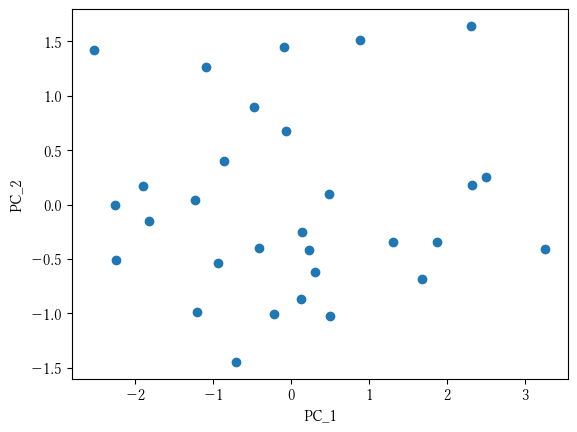

In [11]:
#Cell_11.
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(XXX[:,0],XXX[:,1])
plt.show()

In [13]:
#Cell_12.
print("各主成分ごとの寄与率：",pca.explained_variance_ratio_)
print("各主成分までの累積寄与率：",np.cumsum(pca.explained_variance_ratio_))

各主成分ごとの寄与率： [0.57885389 0.17604985]
各主成分までの累積寄与率： [0.57885389 0.75490374]


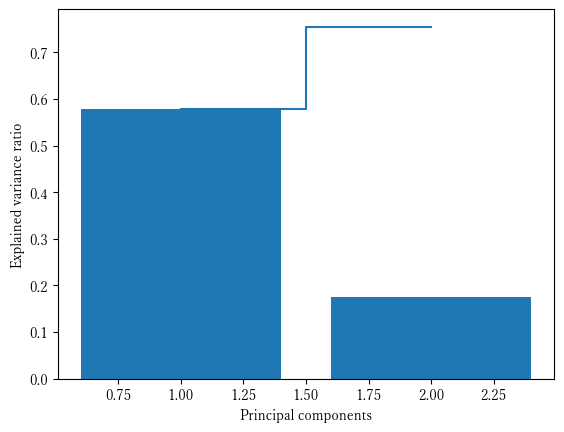

In [13]:
#Cell_13.
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

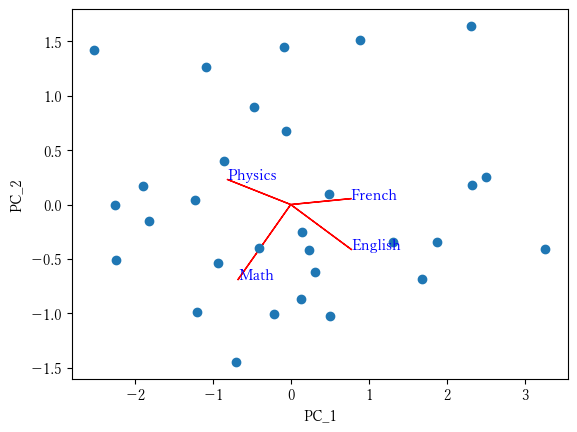

In [14]:
#Cell_14.
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 1
    r2 = 1
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], loadings.T, coef_labels=dfX.columns)